# 𝐈𝐧𝐭𝐫𝐨𝐝𝐮𝐜𝐭𝐢𝐨𝐧

This data analyzes gun-related data using a jupyter Notebook. It explores trends, disparities, and implications of gun-related deaths by examining factors such as time, education level, age group, race, location, and gender. Insights gained shed light on the complex nature of gun violence in the United States.

In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gun-deaths-in-the-us-1968-2021/guns_2018.csv
/kaggle/input/gun-deaths-in-the-us-1968-2021/guns_2013.csv
/kaggle/input/gun-deaths-in-the-us-1968-2021/guns_2006.csv
/kaggle/input/gun-deaths-in-the-us-1968-2021/guns_2014.csv
/kaggle/input/gun-deaths-in-the-us-1968-2021/guns_2007.csv
/kaggle/input/gun-deaths-in-the-us-1968-2021/guns_2020.csv
/kaggle/input/gun-deaths-in-the-us-1968-2021/guns_2012.csv
/kaggle/input/gun-deaths-in-the-us-1968-2021/guns_2010.csv
/kaggle/input/gun-deaths-in-the-us-1968-2021/guns_2017.csv
/kaggle/input/gun-deaths-in-the-us-1968-2021/guns_2016.csv
/kaggle/input/gun-deaths-in-the-us-1968-2021/guns_2009.csv
/kaggle/input/gun-deaths-in-the-us-1968-2021/guns_2015.csv
/kaggle/input/gun-deaths-in-the-us-1968-2021/guns_2011.csv
/kaggle/input/gun-deaths-in-the-us-1968-2021/guns_2019.csv
/kaggle/input/gun-deaths-in-the-us-1968-2021/guns_2008.csv


In [3]:
# Read CSV files from List
df = pd.concat(map(pd.read_csv, ['/kaggle/input/gun-deaths-in-the-us-1968-2021/guns_2006.csv', '/kaggle/input/gun-deaths-in-the-us-1968-2021/guns_2007.csv',
                                 '/kaggle/input/gun-deaths-in-the-us-1968-2021/guns_2008.csv', '/kaggle/input/gun-deaths-in-the-us-1968-2021/guns_2009.csv',
                                 '/kaggle/input/gun-deaths-in-the-us-1968-2021/guns_2010.csv',
                                '/kaggle/input/gun-deaths-in-the-us-1968-2021/guns_2011.csv','/kaggle/input/gun-deaths-in-the-us-1968-2021/guns_2012.csv',
                                '/kaggle/input/gun-deaths-in-the-us-1968-2021/guns_2013.csv','/kaggle/input/gun-deaths-in-the-us-1968-2021/guns_2014.csv',
                                '/kaggle/input/gun-deaths-in-the-us-1968-2021/guns_2015.csv','/kaggle/input/gun-deaths-in-the-us-1968-2021/guns_2016.csv',
                                '/kaggle/input/gun-deaths-in-the-us-1968-2021/guns_2017.csv','/kaggle/input/gun-deaths-in-the-us-1968-2021/guns_2018.csv',
                                 '/kaggle/input/gun-deaths-in-the-us-1968-2021/guns_2019.csv','/kaggle/input/gun-deaths-in-the-us-1968-2021/guns_2020.csv'
                                ]))

df

,year,month,intent,police,sex,age,race,hispanic,place,education
0,2006,1,Suicide,0,M,81.0,White,100,Home,HS/GED
1,2006,1,Homicide,0,M,55.0,White,100,Other unspecified,Less than HS
2,2006,1,Homicide,0,M,19.0,Black,100,Home,Less than HS
3,2006,1,Homicide,0,M,33.0,Black,100,Other unspecified,Less than HS
4,2006,1,Homicide,0,M,23.0,Black,100,Home,Less than HS
...,...,...,...,...,...,...,...,...,...,...
45217,2020,12,Suicide,0,M,35.0,Hispanic,275,Home,Some college
45218,2020,12,Homicide,0,M,34.0,Black,100,Street,HS/GED
45219,2020,12,Homicide,0,M,26.0,Black,100,Street,HS/GED
45220,2020,12,Homicide,0,M,24.0,Black,100,Trade/service area,HS/GED


In [17]:
# View the first n rows
df.head()

,year,month,intent,police,sex,age,race,hispanic,place,education
0,2006,1,Suicide,0,M,81.0,White,100,Home,HS/GED
1,2006,1,Homicide,0,M,55.0,White,100,Other unspecified,Less than HS
2,2006,1,Homicide,0,M,19.0,Black,100,Home,Less than HS
3,2006,1,Homicide,0,M,33.0,Black,100,Other unspecified,Less than HS
4,2006,1,Homicide,0,M,23.0,Black,100,Home,Less than HS


In [5]:
# View the last n rows
df.tail()

,year,month,intent,police,sex,age,race,hispanic,place,education
45217,2020,12,Suicide,0,M,35.0,Hispanic,275,Home,Some college
45218,2020,12,Homicide,0,M,34.0,Black,100,Street,HS/GED
45219,2020,12,Homicide,0,M,26.0,Black,100,Street,HS/GED
45220,2020,12,Homicide,0,M,24.0,Black,100,Trade/service area,HS/GED
45221,2020,12,Homicide,1,M,18.0,Hispanic,299,NaN,HS/GED


In [6]:
# View total number of columns and rows
df.shape

(529233, 10)

In [7]:
# Get info about the data in the df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 529233 entries, 0 to 45221
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       529233 non-null  int64  
 1   month      529233 non-null  int64  
 2   intent     529206 non-null  object 
 3   police     529233 non-null  int64  
 4   sex        529233 non-null  object 
 5   age        529156 non-null  float64
 6   race       529233 non-null  object 
 7   hispanic   529233 non-null  int64  
 8   place      522573 non-null  object 
 9   education  516025 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 44.4+ MB


In [8]:
# View summary statistics
df.describe()

,year,month,police,age,hispanic
count,529233.000000,529233.000000,529233.000000,529156.000000,529233.000000
mean,2013.480724,6.569454,0.012824,42.918429,115.337774
std,4.359197,3.400949,0.112516,19.485696,61.992719
min,2006.000000,1.000000,0.000000,0.000000,100.000000
25%,2010.000000,4.000000,0.000000,26.000000,100.000000
50%,2014.000000,7.000000,0.000000,40.000000,100.000000
75%,2017.000000,9.000000,0.000000,57.000000,100.000000
max,2020.000000,12.000000,1.000000,109.000000,998.000000


In [9]:
# Check for missing values
df.isna().sum()

year             0
month            0
intent          27
police           0
sex              0
age             77
race             0
hispanic         0
place         6660
education    13208
dtype: int64

Above columns indicates the presence of missing values in certain columns of the DataFrame. Specifically, the 'intent' column has 27 missing values, 'age' has 77 missing values, 'place' has 6660 missing values, and 'education' has 13208 missing values. I have chosen not to alter or fill these missing values for several reasons. Firstly, modifying the missing values without a robust imputation strategy may introduce biases or distort the original data distribution. Secondly, the missing values themselves may carry significant information or patterns that could impact the analysis. Preserving them allows for a more accurate representation of the dataset. Lastly, the high number of missing values in the 'place' and 'education' columns poses challenges for reliable imputation. By leaving the missing values as is, the data integrity is maintained, and any potential biases or inaccuracies from imputation are avoided.

# 𝐓𝐫𝐞𝐧𝐝 𝐢𝐧 𝐆𝐮𝐧-𝐑𝐞𝐥𝐚𝐭𝐞𝐝 𝐃𝐞𝐚𝐭𝐡𝐬 (2006-2020)

How has the trend in gun-related deaths changed from 2006 to 2020? Are there any significant fluctuations or patterns? And if so, what is the percentage change from 2006 to 2020 in gun-related deaths?

The percentage change in gun-related deaths from 2006 to 2020 is: 46.37%


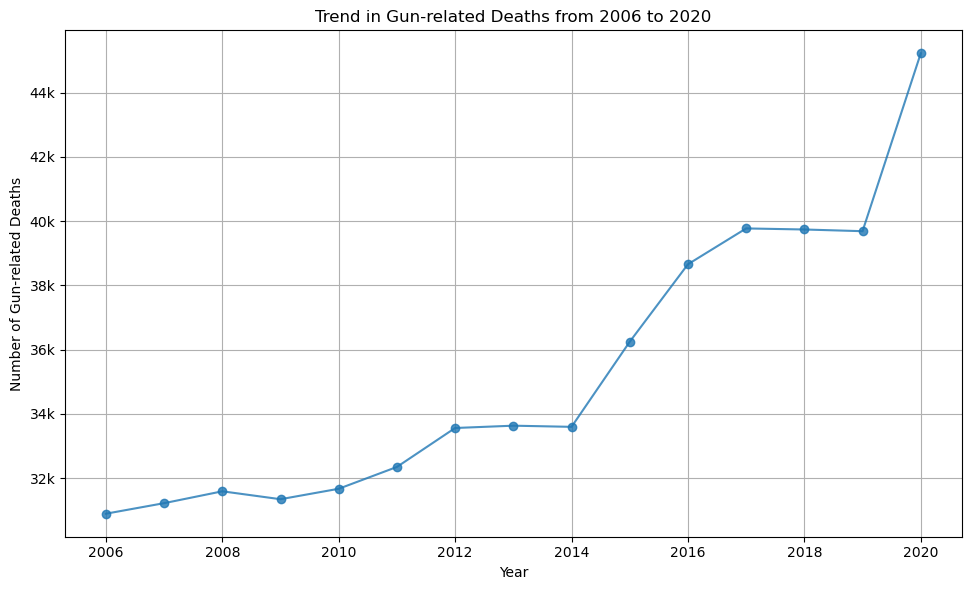

In [10]:
# Group the data by year and calculate the total number of gun-related deaths
deaths_by_year = df[df['year'].between(2006, 2020)].groupby('year')['intent'].count()

# Calculate the percentage change in gun-related deaths from 2006 to 2020
percentage_change = ((deaths_by_year[2020] - deaths_by_year[2006]) / deaths_by_year[2006]) * 100

# Print the percentage change in gun-related deaths from 2006 to 2020
print(f"The percentage change in gun-related deaths from 2006 to 2020 is: {percentage_change:.2f}%")

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the trend in gun-related deaths over the years
plt.plot(deaths_by_year.index, deaths_by_year.values, marker='o', linestyle='-', markersize=6, alpha=0.8)
plt.xlabel('Year')
plt.ylabel('Number of Gun-related Deaths')
plt.title('Trend in Gun-related Deaths from 2006 to 2020')
plt.grid(True)
plt.tight_layout()

# Format the y-axis labels to display data in 1k or 5k
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k' if x >= 1000 else f'{int(x)}'))

plt.show()

The analysis of gun-related deaths from 2006 to 2020 reveals an intriguing trend with both fluctuations and overall growth in the number of incidents. The data showcases varying counts each year, with notable spikes occurring in specific periods. The observed counts range from 30,896 in 2006 to 45,221 in 2020, indicating a steady rise in gun-related fatalities over the analyzed timeframe.

Examining the yearly progression, several years stand out as significant milestones. In 2015, there was a notable increase in gun-related deaths, reaching 36,247 cases. The following year, 2016, witnessed a further surge with 38,658 deaths reported. This upward trend continued in 2017, reaching a peak of 39,773 fatalities. While the counts remained relatively high in subsequent years, they stabilized around 39,000, showing a consistent level of gun-related deaths.

The overall percentage change in gun-related deaths from 2006 to 2020 is approximately 46.4%. This substantial increase highlights the urgency and importance of addressing the complex issue of gun violence. It underscores the need for comprehensive efforts to enhance gun control measures, promote mental health support and awareness, and implement preventive interventions targeting the root causes of violence.

# 𝐑𝐞𝐥𝐚𝐭𝐢𝐨𝐧𝐬𝐡𝐢𝐩 𝐁𝐞𝐭𝐰𝐞𝐞𝐧 𝐄𝐝𝐮𝐜𝐚𝐭𝐢𝐨𝐧 𝐋𝐞𝐯𝐞𝐥 𝐚𝐧𝐝 𝐆𝐮𝐧-𝐑𝐞𝐥𝐚𝐭𝐞𝐝 𝐃𝐞𝐚𝐭𝐡𝐬

Check if there is any relation between eduction level and intent Is there a relationship between the level of education and gun-related deaths? Do individuals with different educational backgrounds exhibit varying rates of involvement in gun-related fatalities?

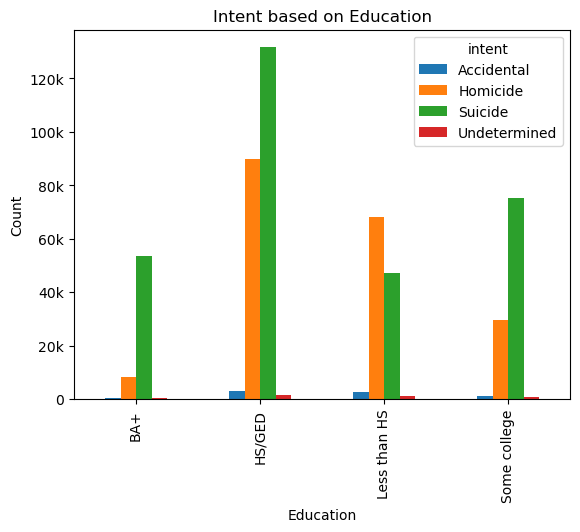

In [11]:
df.groupby('education')['intent'].value_counts().unstack().plot(kind='bar')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Intent based on Education')

# Format the y-axis labels to display data in 1k or 5k
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k' if x >= 1000 else f'{int(x)}'))

plt.show()

Based on above chart, there appears to be a relationship between education level and intent. The data indicates that the highest rates of suicide and homicide are observed among individuals with a high school diploma or GED. Additionally, the overall intent count is highest for individuals with a GED, while it is lowest for those with a BA+ degree.

Furthermore, when considering specific intent categories, the data shows that suicide rates are lowest among individuals with less than a high school education. However, the homicide rate is second highest among individuals with less than a high school education.

These findings suggest that education level may play a role in influencing intent, particularly in relation to suicide and homicide. However, it is important to note that these observations are based on the provided data, and further analysis would be necessary to establish any causal relationships or identify potential confounding factors.

# 𝐀𝐠𝐞 𝐆𝐫𝐨𝐮𝐩 𝐰𝐢𝐭𝐡 𝐇𝐢𝐠𝐡𝐞𝐬𝐭 𝐒𝐮𝐢𝐜𝐢𝐝𝐞 𝐑𝐚𝐭𝐞

Investigate the age group that exhibits the highest suicide rate and create a corresponding visualization.

The age group with the highest number of suicides is: (50, 60]


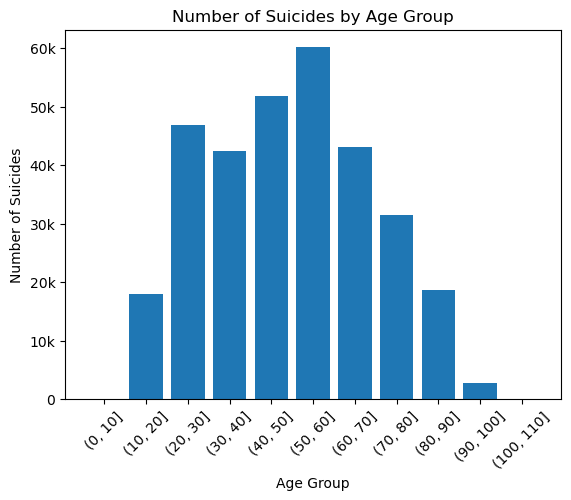

In [12]:
age_groups = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]  # Define the age groups

# Filter the dataframe to include only rows where the intent is 'Suicide'
suicide_data = df[df['intent'] == 'Suicide']

# Group the data by age groups and calculate the count of suicides
suicide_by_age = suicide_data.groupby(pd.cut(suicide_data['age'], age_groups)).size()

# Find the age group with the highest number of suicides
most_suicides_age_group = suicide_by_age.idxmax()
print("The age group with the highest number of suicides is:", most_suicides_age_group)

# Plot the number of suicides by age group
plt.bar(suicide_by_age.index.astype(str), suicide_by_age.values)
plt.xlabel('Age Group')
plt.ylabel('Number of Suicides')
plt.title('Number of Suicides by Age Group')
plt.xticks(rotation=45)

# Format the y-axis labels to display data in 1k or 5k
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k' if x >= 1000 else f'{int(x)}'))

plt.show()

Based on the conducted analysis of gun-related deaths, the age group exhibiting the highest suicide rate has been identified. Among the various intent categories, "Suicide" stands out with the highest count, totaling 315,225 incidents. 

To visualize the distribution of suicides across different age groups, a bar chart has been created. The x-axis of the chart represents the age groups, while the y-axis represents the number of suicides. Notably, the age group (50, 60] has emerged as the age group with the highest number of suicides.

This finding highlights the significance of understanding the underlying factors contributing to the higher suicide rates within this specific age group. It underscores the need for targeted interventions, mental health support, and resources aimed at prevention strategies tailored to individuals in this age range.

By conducting the analysis and presenting the data through a visually informative chart, valuable insights have been gained into the distribution and trends of gun-related deaths across different age groups. These insights can inform the development of effective strategies and support systems to address the incidence of suicide within the identified age group.

# 𝐇𝐨𝐦𝐢𝐜𝐢𝐝𝐞𝐬 𝐁𝐚𝐬𝐞𝐝 𝐨𝐧 𝐑𝐚𝐜𝐢𝐚𝐥 𝐏𝐫𝐨𝐟𝐢𝐥𝐢𝐧𝐠

How many homicides have been reported based on racial profiling?

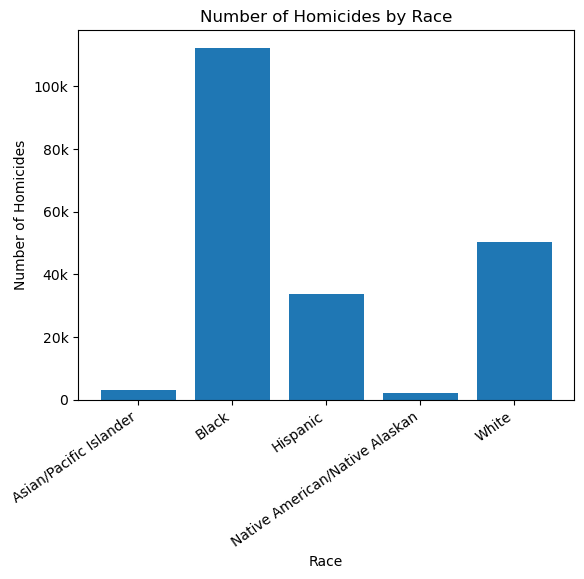

In [13]:
homicide_data = df[df['intent'] == 'Homicide']
homicide_data_by_race = homicide_data.groupby('race')['intent'].size()

# Plot the number of homicides by race
plt.bar(homicide_data_by_race.index.astype(str), homicide_data_by_race.values)
plt.xlabel('Race')
plt.ylabel('Number of Homicides')
plt.title('Number of Homicides by Race')

# Add race names on top of each bar
plt.xticks(rotation=35, ha='right')

# Format the y-axis labels to display data in 1k or 5k
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k' if x >= 1000 else f'{int(x)}'))

plt.show()

After analyzing above chart we can see that number of homicides reported based on racial profiling varies across different racial or ethnic groups. 

Among the racial or ethnic groups mentioned, the highest number of homicides is reported for the Black population, with a total of 112,328 cases. This is followed by the White population, with 50,180 reported homicides. The Hispanic population has 33,738 reported homicides, while the Asian/Pacific Islander population has 3,204 reported homicides. The Native American/Native Alaskan population has the lowest number of reported homicides, with 2,018 cases.

These figures highlight the disparities in homicide rates among different racial or ethnic groups. It is important to note that these numbers represent reported homicides and may not capture the complete picture, as some cases may go unreported or remain unresolved.

Understanding the factors contributing to these disparities requires further analysis, taking into account socio-economic factors, systemic biases, cultural dynamics, and other contextual variables. Efforts to address these disparities and promote equality in safety and security should consider these factors and work towards creating a more equitable society.

# 𝐋𝐨𝐜𝐚𝐭𝐢𝐨𝐧𝐬 𝐏𝐫𝐨𝐧𝐞 𝐭𝐨 𝐆𝐮𝐧-𝐑𝐞𝐥𝐚𝐭𝐞𝐝 𝐃𝐞𝐚𝐭𝐡𝐬

Where do most gun-related deaths occur? Are there specific locations(such as home, street, etc.) that are more prone to such incidents?

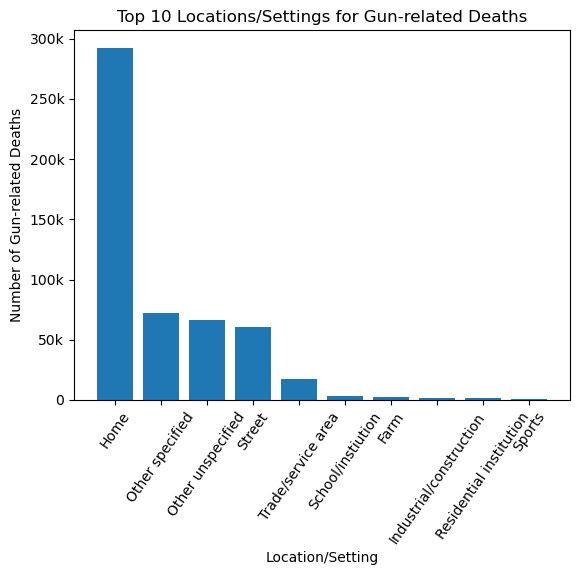

In [14]:
# Filter the data for gun-related deaths
gun_deaths = df[df['intent'] != 'Undetermined']

# Group the gun deaths by place and calculate the counts
death_counts = gun_deaths['intent'].groupby(gun_deaths['place']).count()

# Sort the death counts in descending order
sorted_counts = death_counts.sort_values(ascending=False)

# Plot the all locations/settings with the highest number of gun-related deaths
plt.bar(sorted_counts.index, sorted_counts.values)
plt.xlabel('Location/Setting')
plt.ylabel('Number of Gun-related Deaths')
plt.title('Top 10 Locations/Settings for Gun-related Deaths')
plt.xticks(rotation=55)

# Format the y-axis labels to display data in 1k or 5k
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k' if x >= 1000 else f'{int(x)}'))

# Print the highest number of deaths in the "home" location
highest_deaths_home = sorted_counts['Home']
plt.show()

Based on above chart, the distribution of gun-related deaths across various locations shows that the home setting has the highest number of deaths (295,079), followed by other specified locations (72,357), other unspecified locations (67,542), and the street (60,779). 

In contrast, certain locations have relatively lower occurrences of gun-related deaths. These include trade/service areas (17,838 deaths), school/institution settings (3,245 deaths), farms (2,337 deaths), industrial/construction areas (1,376 deaths), and residential institutions (1,344 deaths).

These findings indicate that certain locations, such as homes, streets, and unspecified locations, are more prone to gun-related incidents and have higher rates of fatalities compared to other settings. However, it is essential to consider that the prevalence of gun-related deaths can vary based on various factors, including demographics, population density, crime rates, and access to firearms.

# 𝐆𝐞𝐧𝐝𝐞𝐫-𝐁𝐚𝐬𝐞𝐝 𝐃𝐢𝐬𝐩𝐚𝐫𝐢𝐭𝐢𝐞𝐬 𝐢𝐧 𝐆𝐮𝐧-𝐑𝐞𝐥𝐚𝐭𝐞𝐝 𝐃𝐞𝐚𝐭𝐡𝐬

How does the distribution of gun-related deaths differ between sexes? Are there any gender-based disparities or trends?

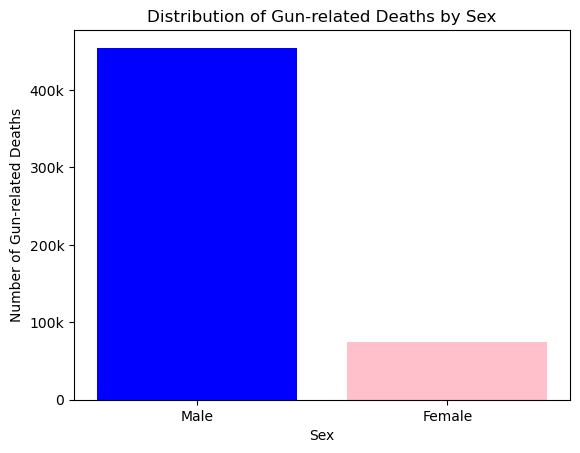

In [15]:
# Calculate the count of gun-related deaths by sex
death_counts_by_sex = df['sex'].value_counts()

# Define colors for bars and corresponding labels (male = M or female = F)
colors = ['blue', 'pink']
labels = ['Male', 'Female']

# Plot the distribution of gun-related deaths by sex 
plt.bar(death_counts_by_sex.index, death_counts_by_sex.values, color=colors)

# Customize the x-axis ticks with color labels
plt.xticks(ticks=death_counts_by_sex.index, labels=labels)

# Format the y-axis labels to display data in 1k or 5k
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k' if x >= 1000 else f'{int(x)}'))

plt.xlabel('Sex')
plt.ylabel('Number of Gun-related Deaths')
plt.title('Distribution of Gun-related Deaths by Sex')
plt.show()

As we can analyse in above chart the distribution of gun-related deaths differs between sexes. There are 74,709 reported deaths among females and 454,524 reported deaths among males. These numbers indicate a gender-based disparity, with a significantly higher number of gun-related deaths among males compared to females.

# 𝐒𝐢𝐠𝐧𝐢𝐟𝐢𝐜𝐚𝐧𝐭 𝐜𝐡𝐚𝐧𝐠𝐞𝐬 𝐢𝐧 𝐠𝐮𝐧-𝐫𝐞𝐥𝐚𝐭𝐞𝐝 𝐝𝐞𝐚𝐭𝐡𝐬

Have there been any significant changes in gun-related deaths over time based on geographical location (place)? Are there specific regions or areas that have experienced notable shifts in gun violence rates?

<Figure size 1000x600 with 0 Axes>

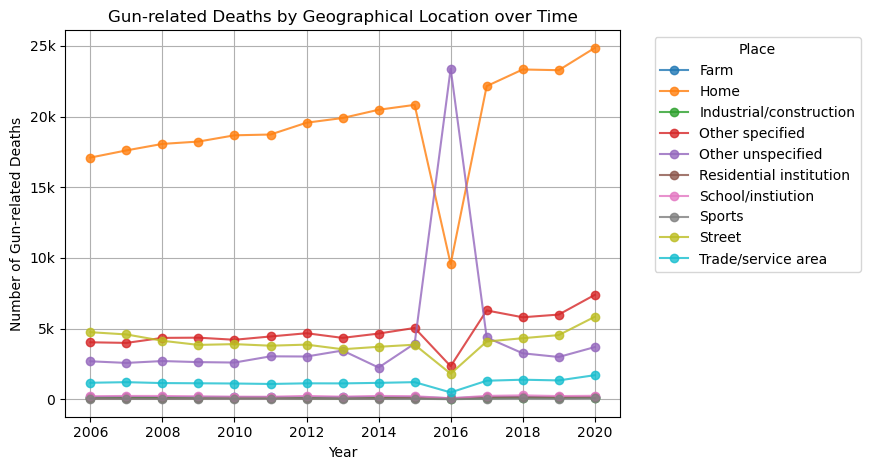

In [16]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Filter the data for gun-related deaths
gun_deaths = df[df['intent'] != 'Undetermined']

# Group the gun deaths by year and place, and calculate the counts
death_counts_by_year_place = gun_deaths.groupby(['year', 'place'])['intent'].count().unstack()

# Plot the changes in gun-related deaths by place over time
death_counts_by_year_place.plot(marker='o', linestyle='-', markersize=6, alpha=0.8)

# Format the y-axis labels to display data in 1k or 5k
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k' if x >= 1000 else f'{int(x)}'))

plt.xlabel('Year')
plt.ylabel('Number of Gun-related Deaths')
plt.title('Gun-related Deaths by Geographical Location over Time')
plt.grid(True)
plt.tight_layout()

# Create the legend outside the main graph
plt.legend(title='Place', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In above graph we can observed fluctuations in gun-related deaths in the US. After the sudden decrease in gun-related deaths at home in 2016 and increase in other unspecified locations in 2016, the subsequent year witnessed a reversal of these trends, with an increase in deaths at home and a decrease in unspecified locations.

These fluctuations may be influenced by a range of factors, including changes in societal dynamics, policy interventions, shifts in reporting practices, or variations in data collection and categorization. Understanding the underlying causes requires a more detailed analysis that considers additional contextual information and investigates potential contributing factors specific to each location and time period.

# 𝐂𝐨𝐫𝐫𝐞𝐥𝐚𝐭𝐢𝐨𝐧: 𝐀𝐠𝐞 𝐚𝐧𝐝 𝐈𝐧𝐭𝐞𝐧𝐭 𝐢𝐧 𝐆𝐮𝐧 𝐈𝐧𝐜𝐢𝐝𝐞𝐧𝐭𝐬

What is the correlation between age and different intent categories in gun-related incidents, and why is it important to examine?

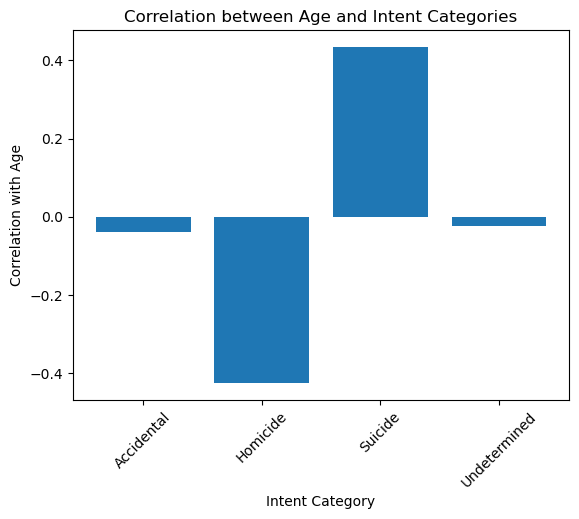

In [53]:
# Perform one-hot encoding on the 'intent' column
encoded_intent = pd.get_dummies(df['intent'])

# Concatenate the encoded intent columns with the 'age' column
encoded_df = pd.concat([encoded_intent, df['age']], axis=1)

# Calculate the correlation matrix
correlation_matrix = encoded_df.corr()

# Get the correlation coefficients between age and each intent category
correlation_age_intent = correlation_matrix['age'].drop('age')

# Plot the correlation coefficients
plt.bar(correlation_age_intent.index, correlation_age_intent.values)
plt.xlabel('Intent Category')
plt.ylabel('Correlation with Age')
plt.title('Correlation between Age and Intent Categories')
plt.xticks(rotation=45)
plt.show()

The correlation between age and intent in gun-related incidents reveals interesting patterns. There is a positive correlation (0.435) between age and suicide, suggesting that older individuals are more likely to be involved in self-inflicted gun deaths. On the other hand, there is a negative correlation between age and homicide (-0.425), indicating that younger individuals may be more prone to being victims of gun-related homicides. The correlation with accidental deaths is weakly negative (-0.039), implying that age may not be a significant factor in accidental gun incidents. The correlation with undetermined intent is also weakly negative (-0.023), suggesting that age may not strongly influence incidents with undetermined intent. Analyzing the correlation between age and intent is important as it provides insights into the relationship between age groups and specific types of gun-related incidents, which can help inform targeted prevention strategies and policies.